In [10]:
#import packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D 

In [11]:
# Step 1: Load data
drug1_data = pd.read_csv("drug_27_curve_data_1_23_25.csv")
drug2_data = pd.read_csv("empa_curve_data_1_23_25.csv")

In [12]:
# Extract concentrations and replicates
concentrations = drug1_data.iloc[:, 0]  # First column is the concentration
drug1_replicates = drug1_data.iloc[:, 1:]  # Columns 2-5 are replicates
drug2_replicates = drug2_data.iloc[:, 1:]  # Columns 2-5 are replicates

In [13]:
drug1_replicates

,replicate1,replicate2,replicate3,replicate4
0,1280,920,880,2280
1,31320,32680,22440,21160
2,100520,42320,46080,51120
3,47600,26640,39480,45040
4,135680,87280,47360,69760
5,111600,59760,33160,16920


In [14]:
drug2_replicates

,replicate1,replicate2,replicate3,replicate4
0,13520,13600,11240,13480
1,3680,3200,10640,2120
2,8800,2960,13200,13920
3,33800,52320,89720,16800
4,140440,124760,49160,99960
5,40720,63320,68960,141480


In [15]:
# Step 2: Calculate mean and standard error for each concentration
drug1_means = drug1_replicates.mean(axis=1)
drug1_sems = drug1_replicates.sem(axis=1)  # SEM = std / sqrt(n)
drug2_means = drug2_replicates.mean(axis=1)
drug2_sems = drug2_replicates.sem(axis=1)

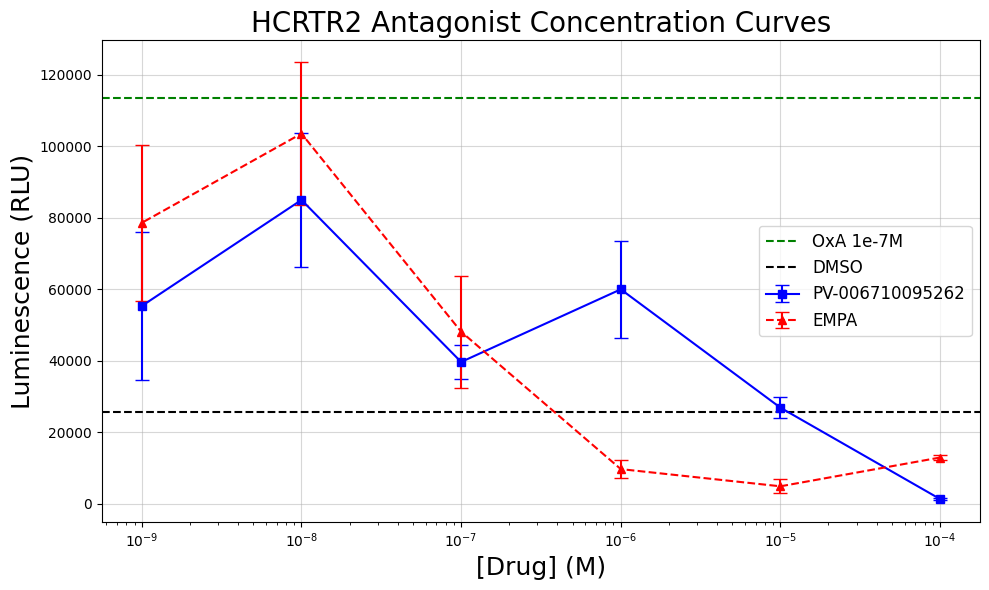

In [17]:
#Plot the data
plt.figure(figsize=(10, 6))

# Plot drug 1
plt.errorbar(
    concentrations, drug1_means, yerr=drug1_sems, fmt="s-", label="PV-006710095262",
    capsize=5, color="blue"
)

# Plot drug 2
plt.errorbar(
    concentrations, drug2_means, yerr=drug2_sems, fmt="^--", label="EMPA",
    capsize=5, color="red"
)

# Customize the plot
plt.title("HCRTR2 Antagonist Concentration Curves", fontsize=20)
plt.xlabel("[Drug] (M)", fontsize=18)
plt.ylabel("Luminescence (RLU)", fontsize=18)
plt.xscale("log")  # Log scale if concentrations span several orders of magnitude

plt.grid(alpha=0.5)
plt.tight_layout()

plt.axhline(y=113420, color="green", linestyle="--", label="OxA 1e-7M")
plt.axhline(y=25800, color="black", linestyle="--", label="DMSO")

# Create custom legend entries for the horizontal lines
#line1 = Line2D([0], [0], color="green", linestyle="--", label="OxA 1e-7M")
#line2 = Line2D([0], [0], color="red", linestyle="--", label="DMSO")

#plt.legend(handles=[line1, line2] + plt.gca().get_lines(), fontsize=12)
plt.legend(fontsize=12)

# Show the plot
plt.show()